# Fourier Representation of Functions

This notebook describes some fundamental concepts regarding representation of functions as Fourier series and Fourier integrals.

## Periodic Functions

A periodic function $f(x)$ of period $T = 2 \ell $ can be represented as a Fourier series  ${f_s}(x)$ of the general form

$${f_s}(x) = {a_0} + \sum\limits_{n = 1}^\infty  {\left( {{a_n}{C_{\frac{{n\pi x}}{\ell }}} + {b_n}{S_{\frac{{n\pi x}}{\ell }}}} \right)} $$

where the coefficients $a_0$ , $a_n$ and $b_n$ are defined by:


$${a_0} = \frac{1}{{2\ell }}\int\limits_{ - \ell }^{ + \ell } {f(x)dx}$$

$${a_n} = \frac{1}{\ell }\int\limits_{ - \ell }^{ + \ell } {f(x){C_{\frac{{n\pi x}}{\ell }}}dx}$$

$${b_n} = \frac{1}{\ell }\int\limits_{ - \ell }^{ + \ell } {f(x){S_{\frac{{n\pi x}}{\ell }}}dx} $$


### Square wave

To clarify consider the following square wave which is periodic with period $T = \pi$

<center><img src="./img/sq_wave.png" alt="square wave" style="width:500px"></center>


and admitting the following Fourier series representation:

$$F{S_{f(x)}} = 2 + \frac{8}{{\pi (2n - 1)}}\sum\limits_{n = 1}^\infty  {{S_{(2n - 1)x}}}. $$

Each term in the function corresponds to a harmonic of a given frequency and amplitude. Let us consider the independent harmonics one step at a time.

In [147]:
%matplotlib notebook
from __future__ import division
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import fourier as fou
from sympy import *
from sympy import init_printing
init_printing()
from IPython.display import Image

In [148]:
def harmonic(n , x , sn): 
    an = 8.0/(np.pi*(2*n-1))
    sn[:] = an*np.sin((2.0*n-1.0)*x[:])
    plt.figure(n)
    plt.plot(x , sn)
    
    return sn

In [149]:
x = np.arange(-5.0 , 5.0 , 0.05)
n = len(x)
sum = np.zeros(n)
sn  = np.zeros(n)

The first term in the series correspond to the constant coefficient $a_0$

<IPython.core.display.Javascript object>


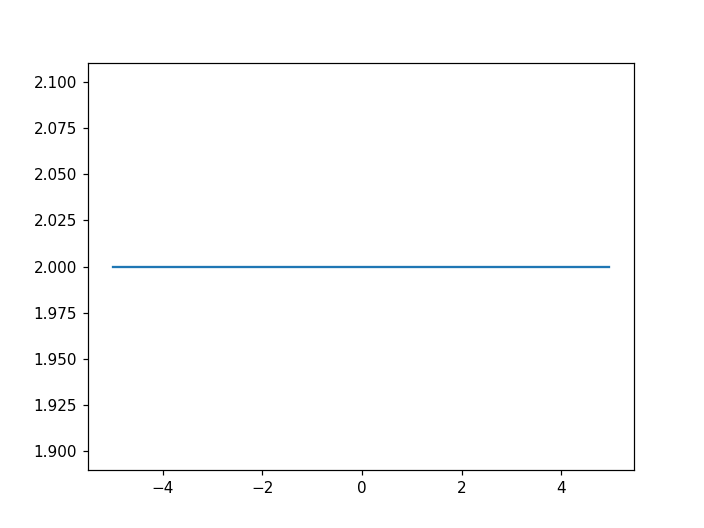

In [150]:
# S0
sum[:] = 2.0
plt.figure(0)
plt.plot(x , sum)

Consider now the term for $n=1$  and up to $ n = 4$

<IPython.core.display.Javascript object>


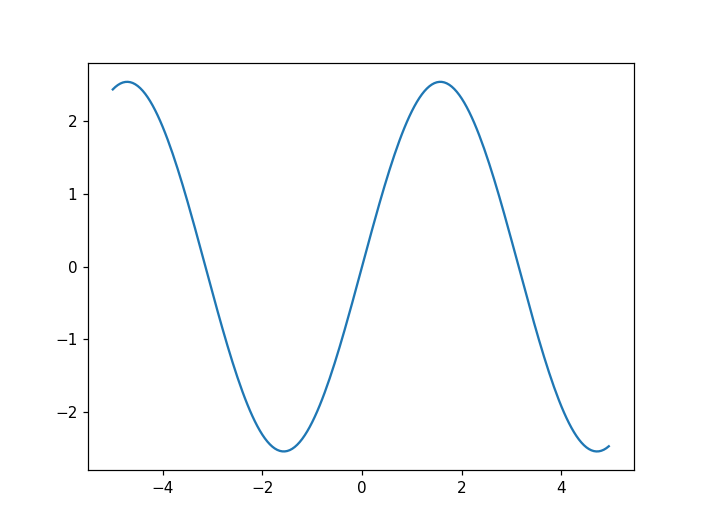

In [151]:
n=1
sn = harmonic(n , x , sn)
sum[:] = sum[:] + sn[:]
sn[:] = 0.0

<IPython.core.display.Javascript object>


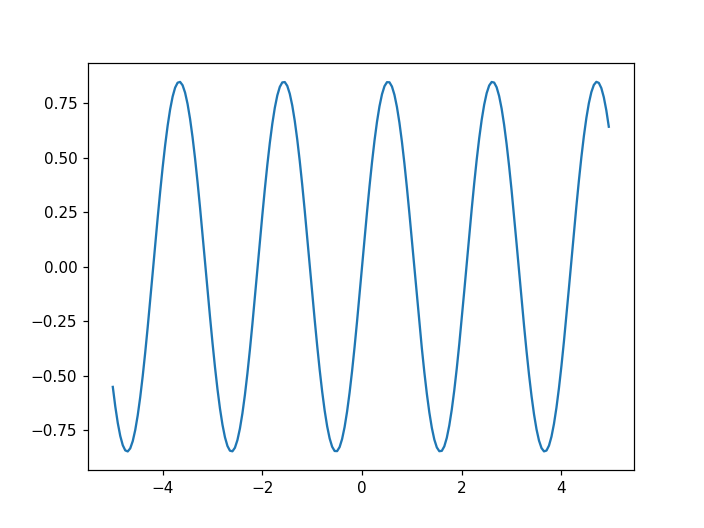

In [152]:
n=2
sn = harmonic(n , x , sn)
sum[:] = sum[:] + sn[:]
sn[:] = 0.0

<IPython.core.display.Javascript object>


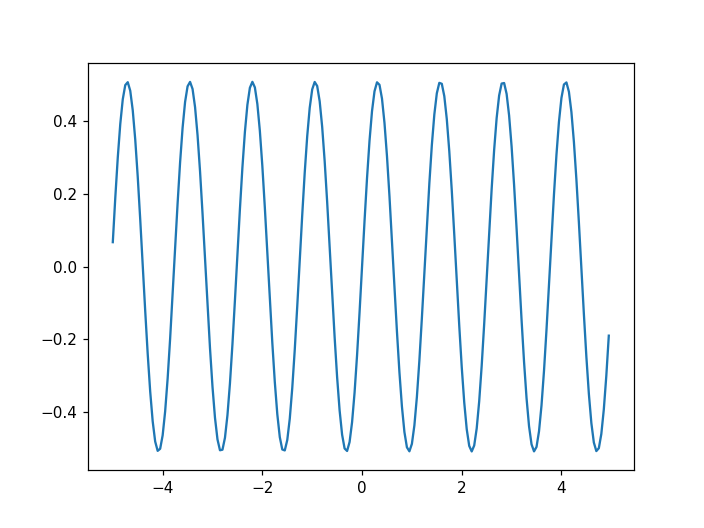

In [153]:
n=3
sn = harmonic(n , x , sn)
sum[:] = sum[:] + sn[:]
sn[:] = 0.0

<IPython.core.display.Javascript object>


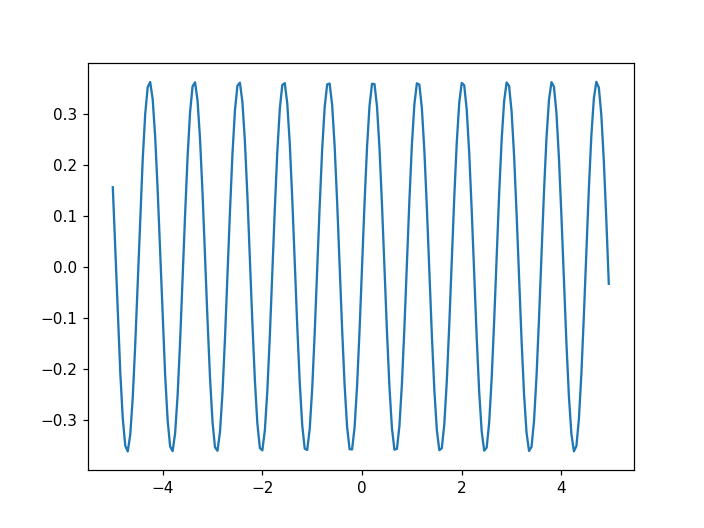

In [154]:
n=4
sn = harmonic(n , x , sn)
sum[:] = sum[:] + sn[:]
sn[:] = 0.0

The function resulting from the partial summation of independent harmonics is shown next. It should be observed how each different harmominc contributes with a different amplitude.

<IPython.core.display.Javascript object>


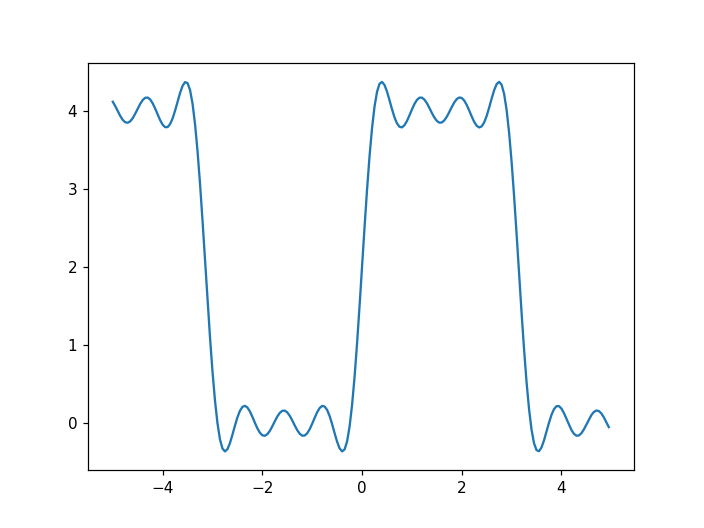

In [155]:
plt.figure(n+1)
plt.plot(x , sum)
plt.show()

### Complex Valued Fourier Series
Substituting the sine and cosine terms in the Fourier series representation discussed above by its corresponding representations in terms of the well-known Euler formulas:

$${C_\theta } = \frac{{{e^{i\theta }} + {e^{ - i\theta }}}}{2}$$

$${S_\theta } = \frac{{{e^{i\theta }} - {e^{ - i\theta }}}}{2i}$$

we have the alternative representation of $f(x)$:

$${f_s}(x) = \sum\limits_{n =  - \infty }^\infty  {{c_n}} {e^{\frac{{in\pi x}}{\ell }}}$$

$${c_n} = \frac{1}{{2\ell }}\int\limits_{ - \ell }^{ + \ell } {f(x){e^{ - \frac{{in\pi x}}{\ell }}}dx}$$

in which the $c_n$ terms and the exponentials are complex functions; although the resulting series  is real.

## Non periodic functions- The Fourier integral

A non-periodic function $f(x)$ can still be represented by a Fourier series if it is assumed periodic with an infinite period in which case the Fourier series representation becomes a continous integral representation:

$$f(x) = \frac{1}{{2\pi }}\int\limits_{ - \infty }^{ + \infty } {F(\omega ){e^{  i\omega x}}d\omega }$$

where:

$$F(\omega ) = \int\limits_{ - \infty }^{ + \infty } {f(x){e^{ - i\omega x}}dx}$$

The above pair of integrals allows one to express functions back and forth in the space (time) and frequency domain. The frequency domain representation $F(\omega)$ of the function $f(x)$ is its Fourier tansform, while the representation of the spatial function $f(x)$ in terms of frequency domain functions $F(\omega)$ is its inverse Fouier transform.


### Analytic transform

Consider now the following function:

$$f(t) = 4.0{e^{ - \left| t \right|}} - 5.0{e^{ - 3\left| {t + 2} \right|}}$$

<IPython.core.display.Javascript object>


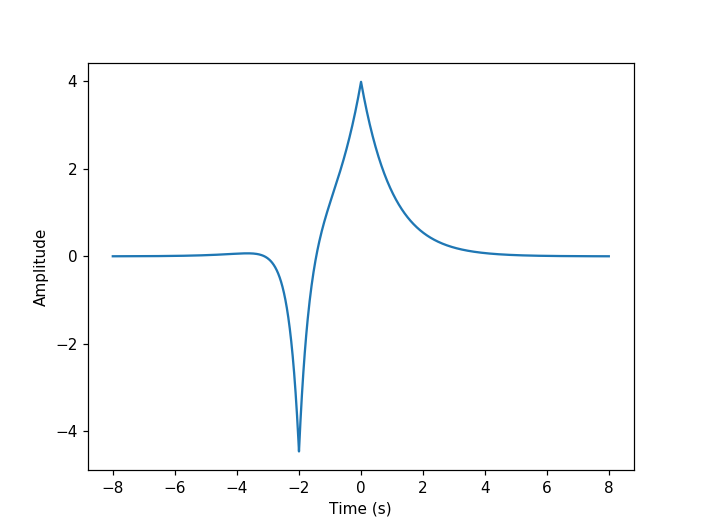

In [156]:
N   = 1024
T_t = 16.0
x = np.arange(-T_t/2.0 , T_t/2.0 ,T_t/N)
n = len(x)
FX = np.zeros((n), dtype = complex)

FX = 4.0*np.exp(-abs(x))-5.0*np.exp(-3.0*abs(x+2.0))
plt.figure(n+7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(x , FX)
plt.show()

with transform given by:

$$F(\omega ) = \frac{8}{{{\omega ^2} + 1}} - \frac{{30{e^{2\hat i\omega }}}}{{{\omega ^2} + 9}}$$

and the following amplitude spectra

<IPython.core.display.Javascript object>


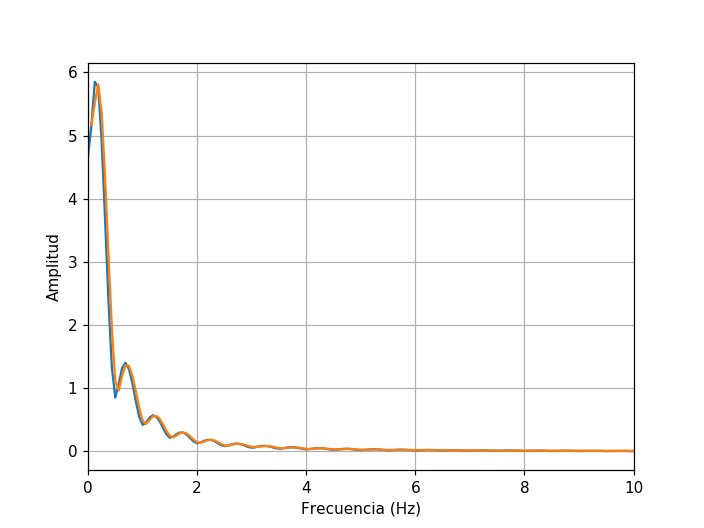

In [157]:
omega = np.arange(0.0 , np.pi*N/T_t , 2.0*np.pi/T_t)
nw = len(omega)
Fw = np.zeros((nw), dtype = complex)
t1 = np.zeros(nw)
t2 = np.zeros(nw)

t1 = 8.0/(omega**2+1.0)
t2 = (30.0/(omega**2+9.0))*np.exp(2*omega*1j)
Fw = t1-t2
plt.figure(n+9)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0.0 , 10.0)
plt.plot(omega/(2.0*np.pi) , np.abs(Fw))
plt.show()
# We can compute it numerically also
FS = 15.0
x , Samag , A , nfs = fou.Ftrans(FX*T_t/N , N , T_t/N , FS)
fou.grafFourier(Samag , x , nfs , n+9)

## Fourier transform with the FFT() algorithm

Consider a time series of maximum frequnency $f_{max}$. From the sampling thorem it follows that the associated time signal must be sampled at least at a rate:

$$\delta = \frac{1}{2f_{max}}$$

in order to capture this maximum frequency.

Consider now a signal of total duration $T$ sampled by $N$ points. The top part of the figure belows schematizes the storage scheme of this signal, while the bottom part displays the distribution of its frequency representation. 

<center><img src="./img/esquema.png" alt="esquema.png" style="width:300px"></center>

After selecting the number of data points $N$, the resulting effective sampling rate turns out to be:

$$\Delta t = \frac{T}{N}$$

allowing to effectivly describe frquencies up to:


$$f = \frac{1}{{2\Delta t}}$$

sampled at:

$$df = \frac{1}{{N} \Delta t}.$$

## The Ricker Wavelet

The Ricker wavelet is a time signal defined by simple paramters allowing to produce time series with a perfectly known spectra. The time signal is defined by the following function:

$$f(t) = \left[ {1 - 2{\pi ^2}f_c^2{{(t - {t_c})}^2}} \right]{e^{ - {\pi ^2}f_c^2{{(t - {t_c})}^2}}}$$


where $f_c$ is the dominant peak frequency of and $t_c$ defines the time location of the center peak. The time width or breadth is given by $t_b$ given by:


$${t_b} = \frac{{\sqrt 6 }}{{\pi {f_c}}}.$$

<center><img src="./img/pulso.png" alt="pulso.png" style="width:400px"></center>


### Design of the Ricker pulse

Although the pulse perse has a duration (or breath) defined by its central frequency according to:

$${t_b} = \frac{{\sqrt 6 }}{{\pi {f_c}}}$$

for analysis purposes it is convenient to locate it within a general signal of duration $T_t$.

To correctly compute the pulse numerically we need to define the total number of time samples $N$ making sure that we keep at last the minimum required sampling rate as specified by $f_c$.

Thus, in the design of the pulse we select (i) the total duration of the signal $T_t$ (ii) the total number of data points $N$ (usually a power of 2) (iii) the time location of the central peak of the pulse $t_c$ and (iv) the central frequency of the pulse $f_c$. Consider the following set of parameters:


Breadth = 0.194924200308 s


<IPython.core.display.Javascript object>


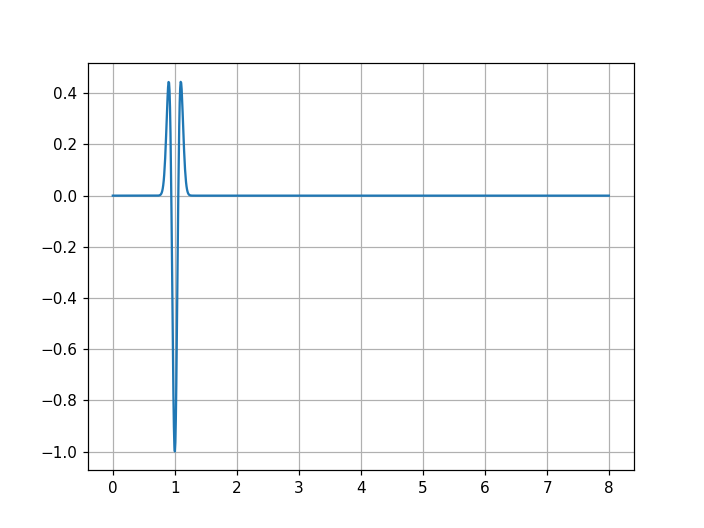

In [158]:
N = 1024
T_t = 8.0
tc = 1.0
fc = 4.0
t_b = np.sqrt(6)/np.pi/fc
print ("Breadth =") , t_b , ('s')
Rick , time = fou.ricker(N , T_t , tc, fc)
fou.grafsignalG(Rick , T_t/N , n+11)

Notice the amplitude spectra can be reproduced up to:

In [159]:
print ('Effctive maximum frquency =') , N/2.0/T_t
print ('Effective time step=') , T_t/N

Effctive maximum frquency = 64.0
Effective time step= 0.0078125


Now, conducting direct fourier transform of the above time signal we obtain the corresponding Fourier amplitude spectra spectra:

<IPython.core.display.Javascript object>


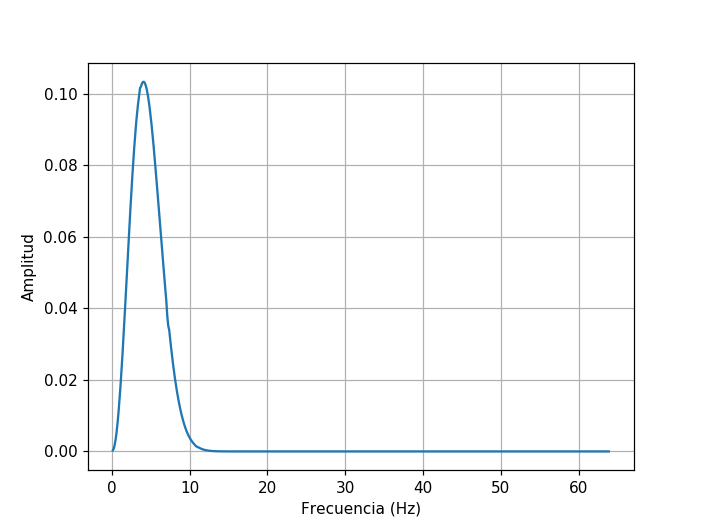

In [160]:
FS = 10.0
x , Samag , A , nfs = fou.Ftrans(Rick*T_t/N , N , T_t/N , FS)
fou.grafFourier(Samag , x , nfs , n+12)

We can also perform inverse Fourier transform to get the time signal once again as follows:

<IPython.core.display.Javascript object>


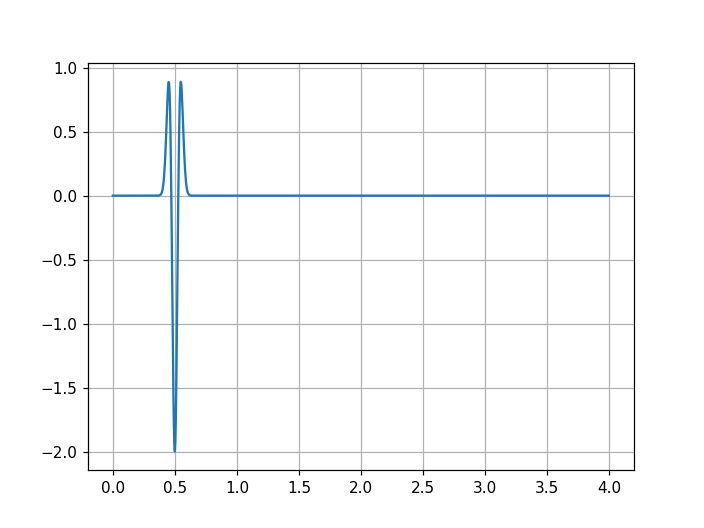

In [166]:
ZZ = np.fft.ifft(A*N/T_t)
ZZ = np.real(ZZ)
fou.grafsignalG(ZZ , T_t/N , n+13)

## A Seismic pulse

Consider the following pulse resembling a typical seismic signal:

$$f(t) = {C_{6\pi t}}{e^{ - \pi {t^2}}}$$

The pulse is discretized according to the following parameters and shown in the figure below:

<IPython.core.display.Javascript object>


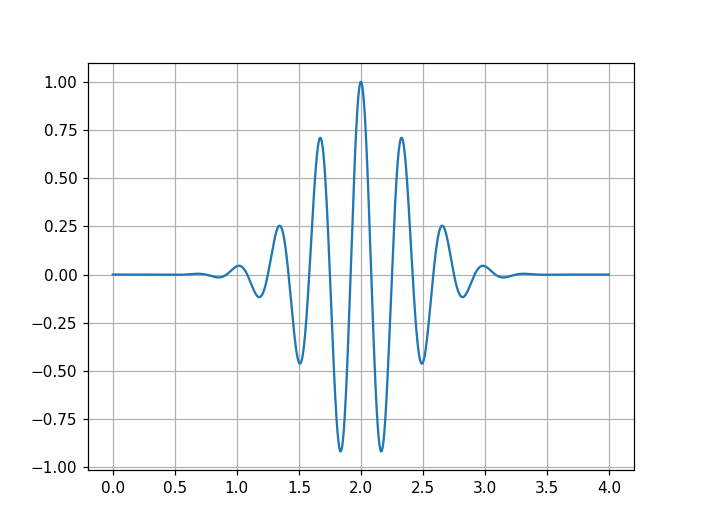

In [144]:
N   = 2048
T_t = 4.0
x = np.arange(-2.0 , 2.0 ,T_t/N)
nn = len(x)
FX = np.zeros((nn), dtype = complex)
xm = x 
pot = -np.pi*xm**2
FX = np.cos(6.0*np.pi*xm)*np.exp(pot)
fou.grafsignalG(FX , T_t/N , n+14 )

And its inverse Fourier transform produces the following amplitude spectra:

<IPython.core.display.Javascript object>


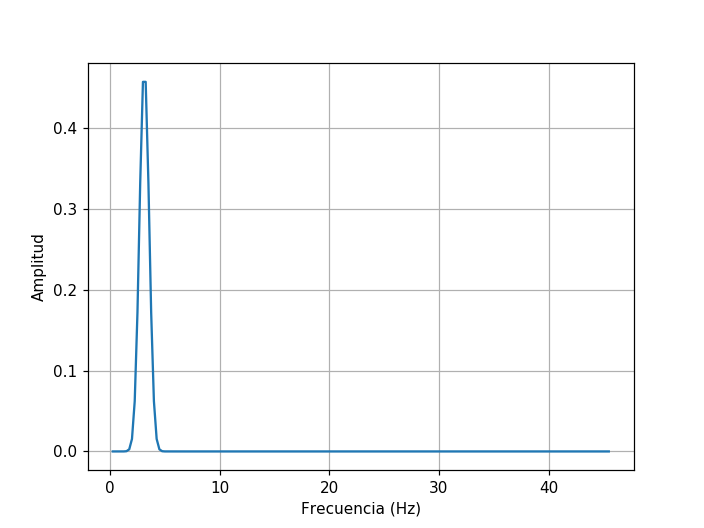

In [145]:
FS = 10.0
x , Samag , A , nfs = fou.Ftrans(FX*T_t/N , N , T_t/N , FS)
fou.grafFourier(Samag , x , nfs , n+15)

## Dynamic rsponse at a point due to a wave passage
Let us design the pulse first

Breadth = 0.779696801234 s


<IPython.core.display.Javascript object>


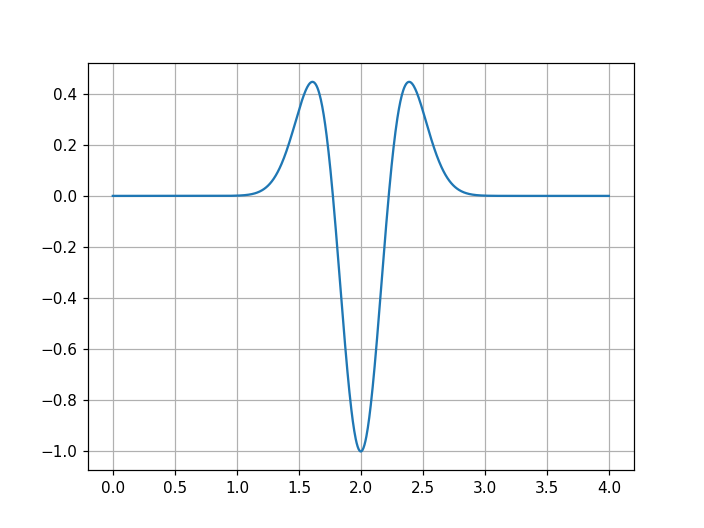

In [174]:
Gamma = 0.524
Beta = 1.0
x = 0.0
y = 0.0
FS = 10
N = 1024
T_t = 4.0
tc = 2.0
fc = 1.0
t_b = np.sqrt(6)/np.pi/fc
print ("Breadth =") , t_b , ('s')
Rick , time = fou.ricker(N , T_t , tc, fc)
x , Sas , Saf , nfs = fou.Ftrans(Rick , N , T_t/N , FS)
fou.grafsignalG(Rick , T_t/N , n+16)

In [183]:
Nf =int((N - 1)/2)
df = 1/T_t
lif = df
lff = df*Nf
fre = np.linspace(lif, lff, Nf , dtype=float)
desplaz = np.zeros(Nf, dtype=complex)
nx1 = np.sin(Gamma)
ny1 =-np.cos(Gamma)
pha_ang_1 = - kapa*(nx1*x + ny1*y)

Let us compute the transfer function :

In [184]:
for j in range (0, Nfr):
    kapa = 2.0*np.pi*fre[j]/Beta
#    desplaz[j] =  np.exp(1j*pha_ang_1)
    
TF = np.zeros(N , dtype=complex)
for i in range(Nfr):
    TF[i+1 ] = desplaz[i]
    TF[-1-i] = np.conj(desplaz[i])

TypeError: only length-1 arrays can be converted to Python scalars

Let us perform the convolution

In [173]:
for i in range(N):
    TF[i] = Saf[i] * TF[i]
    
ZZ = np.fft.ifft(TF)
ZZ = np.real(ZZ)
fou.grafsignalG(ZZ , T_t/N , n+17)

NameError: name 'Nt' is not defined

In [146]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()